In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import json

#Estética de los gráficos
sns.set(color_codes=True)

# Parsear CSV a archivos de entrada del tp

In [2]:
import atp2mn

#Entrada Torneos ATP CSV
matchesCSV = '../../data/atp_matches_2018-2019.csv'
#Entrada Datos de los jugadores CSV
playersCSV = '../../data/atp_players.csv'
#Entrada Ranking ATP oficial
rankingCSV = '../../data/atp_rankings_current.csv'

#Salida para tp1
tpFileIn = 'atp_matches_2018-2019.in'
#Salida de metadatos (nombre jugadores, puntaje atp, etc)
metadataFile = 'metadata.json'

atp2mn.parseFromCSV(matchesCSV, playersCSV, rankingCSV, tpFileIn, metadataFile)

Done


# Correr tp1 con los diferentes métodos

In [3]:
#Configuracion
tpFileIn = 'atp_matches_2018-2019.in'
metadataFile = 'metadata.json'

fileOutCMM = 'rankingCMM.out'
fileOutWP = 'rankingWP.out'
fileOutCMM_ATP = 'rankingCMM_ATP.out'

In [4]:
import subprocess as sp

sp.call(["../tp", tpFileIn, fileOutCMM, '0'])
sp.call(["../tp", tpFileIn, fileOutWP, '1'])
sp.call(["../tp", tpFileIn, fileOutCMM_ATP, '2'])

0

# Parsear rankings generados por tp1

In [5]:
#Cargamos metadatos (nombre de los jugadores, su ranking oficial atp)
with open(metadataFile,'r') as playersJson:
    playersData = json.load(playersJson)

In [6]:
dfCMM = pd.read_csv(fileOutCMM, names=['CMM'])
dfWP = pd.read_csv(fileOutWP, names=['WP'])
dfCMM_ATP = pd.read_csv(fileOutCMM_ATP, names=['CMM-ATP'])

rankings = pd.DataFrame({
    'Puntaje WP': dfWP['WP'],
    'Puntaje CMM': dfCMM['CMM'],
    'Puntaje CMM-ATP': dfCMM_ATP['CMM-ATP'],
    'Puntaje ATP': [playersData[str(i+1)]['pointsATP'] for i in range(len(dfCMM))],
    'Nombre': [playersData[str(i+1)]['name'] for i in range(len(dfCMM))]})

# WP vs ATP oficial

In [7]:
topWP = pd.DataFrame({
    'Puntaje ATP': rankings['Puntaje ATP'],
    'Puntaje WP': rankings['Puntaje WP'],
    'Top WP': rankings['Nombre']
})
topATP = pd.DataFrame({
    'Puntaje ATP': rankings['Puntaje ATP'],
    'Puntaje WP': rankings['Puntaje WP'],
    'Top ATP': rankings['Nombre']
})
display(topWP.sort_values(by=['Puntaje WP'], ascending=False).head(10).style.hide_index())
display(topATP.sort_values(by=['Puntaje ATP'], ascending=False).head(10).style.hide_index())

Puntaje ATP,Puntaje WP,Top WP
84,1,Dima
0,1,Habib
8,1,Michalski
0,1,Llanes
9,1,Alvarez
68,1,Gonzalez
258,1,Coppejans
0,1,Oliel
41,1,Sultanov
0,1,Fetisleam


Puntaje ATP,Puntaje WP,Top ATP
10955,0.833333,Djokovic
8320,0.90566,Nadal
6475,0.765432,Zverev
5085,0.8,Del Potro
4595,0.71875,Anderson
4190,0.693333,Nishikori
4100,0.803571,Federer
3800,0.661538,Thiem
3270,0.634921,Isner
3095,0.672414,Cilic


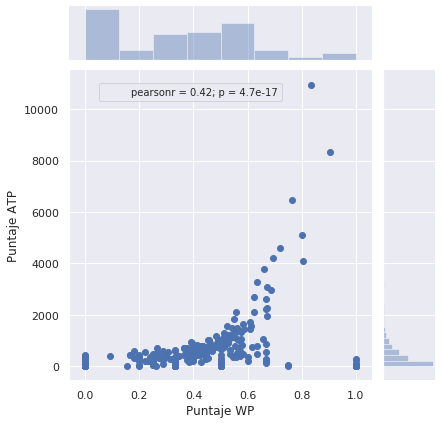

In [9]:
jp = sns.jointplot(x="Puntaje WP", y="Puntaje ATP", data=rankings)
jp.annotate(stats.pearsonr, fontsize=10, loc=(0.1, 0.9))

# CMM vs ATP oficial

In [10]:
topCMM = pd.DataFrame({
    'Puntaje ATP': rankings['Puntaje ATP'],
    'Puntaje CMM': rankings['Puntaje CMM'],
    'Top CMM': rankings['Nombre']
})
topATP = pd.DataFrame({
    'Puntaje ATP': rankings['Puntaje ATP'],
    'Puntaje CMM': rankings['Puntaje CMM'],
    'Top ATP': rankings['Nombre']
})
display(topCMM.sort_values(by=['Puntaje CMM'], ascending=False).head(10).style.hide_index())
display(topATP.sort_values(by=['Puntaje ATP'], ascending=False).head(10).style.hide_index())

Puntaje ATP,Puntaje CMM,Top CMM
8320,1.14249,Nadal
10955,1.08582,Djokovic
4100,1.02906,Federer
5085,1.01672,Del Potro
6475,0.96755,Zverev
4595,0.933563,Anderson
4190,0.931484,Nishikori
2605,0.894371,Coric
3095,0.890739,Cilic
2965,0.882016,Tsitsipas


Puntaje ATP,Puntaje CMM,Top ATP
10955,1.08582,Djokovic
8320,1.14249,Nadal
6475,0.96755,Zverev
5085,1.01672,Del Potro
4595,0.933563,Anderson
4190,0.931484,Nishikori
4100,1.02906,Federer
3800,0.879615,Thiem
3270,0.808518,Isner
3095,0.890739,Cilic


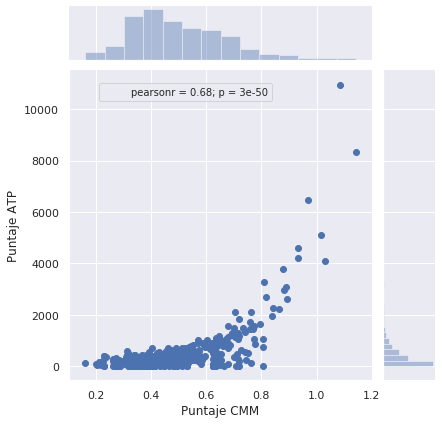

In [11]:
jp = sns.jointplot(x="Puntaje CMM", y="Puntaje ATP", data=rankings)
jp.annotate(stats.pearsonr, fontsize=10, loc=(0.1, 0.9))

# CMM-ATP vs ATP oficial

In [12]:
topCMM_ATP = pd.DataFrame({
    'Puntaje ATP': rankings['Puntaje ATP'],
    'Puntaje CMM-ATP': rankings['Puntaje CMM-ATP'],
    'Top CMM-ATP': rankings['Nombre']
})
topATP = pd.DataFrame({
    'Puntaje ATP': rankings['Puntaje ATP'],
    'Puntaje CMM-ATP': rankings['Puntaje CMM-ATP'],
    'Top ATP': rankings['Nombre']
})
display(topCMM_ATP.sort_values(by=['Puntaje CMM-ATP'], ascending=False).head(10).style.hide_index())
display(topATP.sort_values(by=['Puntaje ATP'], ascending=False).head(10).style.hide_index())

Puntaje ATP,Puntaje CMM-ATP,Top CMM-ATP
8320,1.0343,Nadal
10955,1.02543,Djokovic
5085,0.940883,Del Potro
4190,0.888131,Nishikori
4100,0.867425,Federer
4595,0.863087,Anderson
6475,0.826472,Zverev
3800,0.821637,Thiem
2275,0.816285,Raonic
3095,0.801965,Cilic


Puntaje ATP,Puntaje CMM-ATP,Top ATP
10955,1.02543,Djokovic
8320,1.0343,Nadal
6475,0.826472,Zverev
5085,0.940883,Del Potro
4595,0.863087,Anderson
4190,0.888131,Nishikori
4100,0.867425,Federer
3800,0.821637,Thiem
3270,0.788016,Isner
3095,0.801965,Cilic


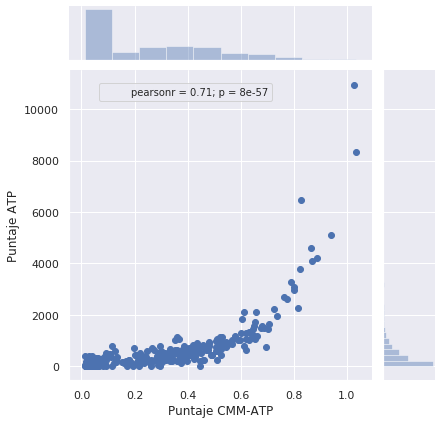

In [13]:
jp = sns.jointplot(x="Puntaje CMM-ATP", y="Puntaje ATP", data=rankings)
jp.annotate(stats.pearsonr, fontsize=10, loc=(0.1, 0.9))